In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Embedding
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


In [25]:
data=pd.read_csv("spam_ham_dataset.csv")
data.shape

(5171, 4)

In [26]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [27]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [28]:
data.drop("label_num", axis=1, inplace=True)

In [29]:
data.groupby('label').describe().T

label                                                      ham           spam
text count                                                3672           1499
     unique                                               3531           1462
     top     Subject: calpine daily gas nomination\r\n>\r\n...  Subject: \r\n
     freq                                                   20             16

In [30]:
data['label']=data['label'].map({'ham':0,'spam':1})
data.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [31]:
x=data['text'].values
y=data['label'].values

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
token=Tokenizer()
token.fit_on_texts(x_train)

In [33]:
encoded_train=token.texts_to_sequences(x_train)
encoded_test=token.texts_to_sequences(x_test)
print(encoded_train[0:1])

[[10, 208, 441, 11691, 21, 30, 1232, 3, 3900, 442, 6, 208, 2, 101, 811, 7457, 559, 888, 22, 25, 1328, 3, 2, 1087, 2995, 33, 1189, 25, 9666, 1, 4, 1040, 12, 2, 2996, 2721, 6, 2, 759, 2996, 6, 2, 134, 210, 390, 33, 1040, 95, 2, 101, 441, 2996, 811, 26, 5346, 500, 6, 25, 1302, 36, 404, 7, 113, 519, 78, 74, 153, 1, 32, 25, 302, 378, 6714, 8, 2319, 194, 20, 7458, 64, 7459, 442, 33, 336, 2, 194, 3, 43, 4, 514, 43, 14, 25, 23493, 225, 820, 252, 134, 16, 23, 2806, 25, 72, 3, 1040, 95, 250, 811, 505, 134, 32, 11, 104, 178, 114, 3, 3900, 16, 99, 787, 572, 243, 25, 379, 820, 252, 134, 96, 43, 67, 1, 33, 191, 43, 37, 357, 3565, 164, 40, 6715, 32, 11, 30, 2262, 3, 775, 64, 811, 243, 2, 9667, 110, 1, 65, 1, 6162, 40, 6163]]


In [34]:
max_length=50

padded_train=pad_sequences(encoded_train,maxlen=max_length,padding='post')
padded_test=pad_sequences(encoded_test,maxlen=max_length,padding='post')

print(padded_train)

[[  505   134    32 ...  6162    40  6163]
 [    4   838    75 ... 23498    47     1]
 [  228     6    78 ...     1  2886   121]
 ...
 [51745  5821 51746 ...     2    17 51762]
 [   10   703   238 ...     0     0     0]
 [    1    10    45 ...    65     1   381]]


In [35]:
vocab_size = len(token.word_index) + 1

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length = max_length))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 24)            1242312   
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_4 (Dense)             (None, 500)               600500    
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 1)                

In [36]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=10)
history=model.fit(x=padded_train,y=y_train,epochs=30,validation_data=(padded_test,y_test),verbose=1,callbacks=[early_stop])

Epoch 1/30
130/130 [==============================] - 4s 25ms/step - loss: 0.3229 - accuracy: 0.8441 - val_loss: 0.1281 - val_accuracy: 0.9469
Epoch 2/30
130/130 [==============================] - 3s 24ms/step - loss: 0.0496 - accuracy: 0.9821 - val_loss: 0.1716 - val_accuracy: 0.9430
Epoch 3/30
130/130 [==============================] - 3s 25ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.1224 - val_accuracy: 0.9652
Epoch 4/30
130/130 [==============================] - 3s 21ms/step - loss: 0.0029 - accuracy: 0.9985 - val_loss: 0.1471 - val_accuracy: 0.9671
Epoch 5/30
130/130 [==============================] - 3s 25ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.1731 - val_accuracy: 0.9671
Epoch 6/30
130/130 [==============================] - 4s 28ms/step - loss: 6.1073e-04 - accuracy: 0.9995 - val_loss: 0.1845 - val_accuracy: 0.9662
Epoch 7/30
130/130 [==============================] - 3s 25ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.1920 - val_accuracy: 0.

In [37]:
model.evaluate(padded_test,y_test)

33/33 [==============================] - 0s 5ms/step - loss: 0.2094 - accuracy: 0.9652


[0.20940205454826355, 0.9652174115180969]

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [39]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

33/33 [==============================] - 0s 3ms/step


In [40]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       742
           1       0.95      0.92      0.94       293

    accuracy                           0.97      1035
   macro avg       0.96      0.95      0.96      1035
weighted avg       0.97      0.97      0.97      1035

Accuracy : 0.9652173913043478


0.9652173913043478

In [41]:
accuracy_score(y_test, preds)

0.9652173913043478

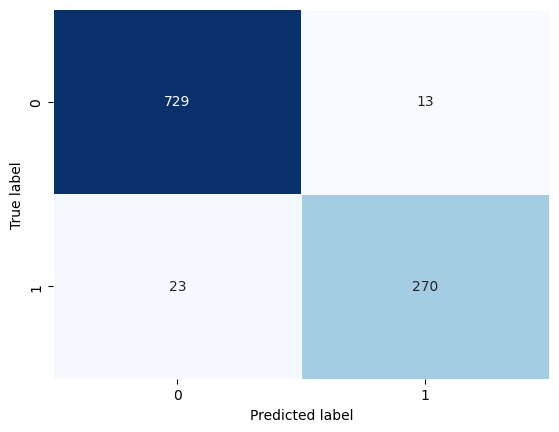

In [42]:
plot_confusion_matrix(y_test, preds)

In [43]:
model.save("spam_model")

INFO:tensorflow:Assets written to: spam_model\assets


INFO:tensorflow:Assets written to: spam_model\assets


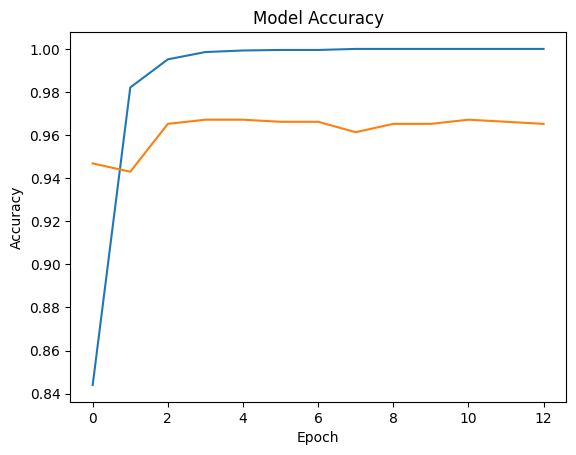

In [44]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [45]:
sms = ["Hi, I'll be late, lets check this tomorrow "]
sms_proc = token.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc) > 0.5).astype("int32")[0].item()
print("Prediction:", pred)

1/1 [==============================] - 0s 45ms/step
Prediction: 0
